In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [12]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
last = session.query(measurement).order_by(desc(measurement.date)).first()
last.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x220fa9c1250>,
 'tobs': 81.0,
 'date': '2017-08-23',
 'station': 'USC00519397',
 'id': 2724,
 'prcp': 0.0}

In [23]:
date = []
precipitation = []
data = session.query(measurement).filter(measurement.date >= '2016-08-23').all()
for record in data:
    date.append(record.date)
    precipitation.append(record.prcp)

In [25]:
data_dict = {
    'date': date,
    'precipitation': precipitation
}

precipitation_data = pd.DataFrame(data_dict)
precipitation_data

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [27]:
precipitation_data = precipitation_data.dropna()
precipitation_data['date'] = pd.to_datetime(precipitation_data['date'])
precipitation_data.sort_values(by='date', ascending=True)
precipitation_data.dtypes

C:\Users\markb\AppData\Local\Temp\ipykernel_23736\2382248966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation_data['date'] = pd.to_datetime(precipitation_data['date'])


date             datetime64[ns]
precipitation           float64
dtype: object

In [29]:
precipitation_data

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


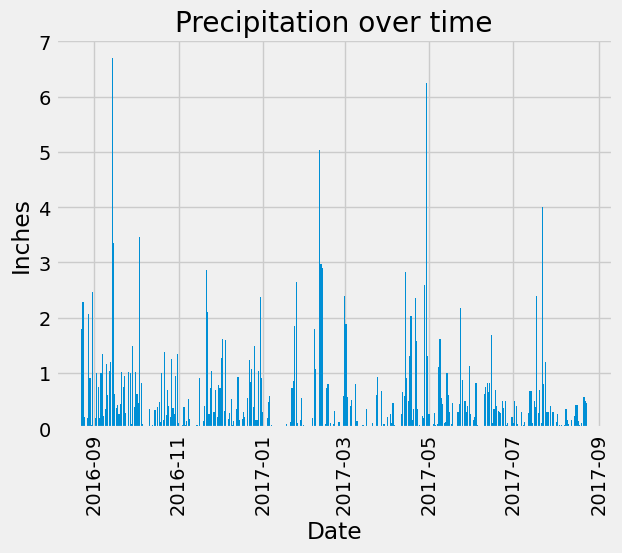

In [31]:
plt.bar(precipitation_data['date'], precipitation_data['precipitation'])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation over time')

plt.xticks(rotation='vertical')
plt.show()

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_data['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number of stations in the dataset
unique_stations = session.query(measurement.station).distinct().all()
len(unique_stations)

9

In [114]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(
    measurement.station,
    func.count(measurement.station)
).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
first = station_counts[0]
first

('USC00519281', 2772)

In [138]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp_data = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
).filter(measurement.station == first[0]).all()
temp_data

[(54.0, 85.0, 71.66378066378067)]

In [150]:
temp = []
temp_data_h = session.query(measurement).filter(measurement.station == first[0]).filter(measurement.date >= '2016-08-23').all()
temp_data_h
for record in temp_data_h:
    temp.append(record.tobs)
temp

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

Text(0, 0.5, 'Temperature')

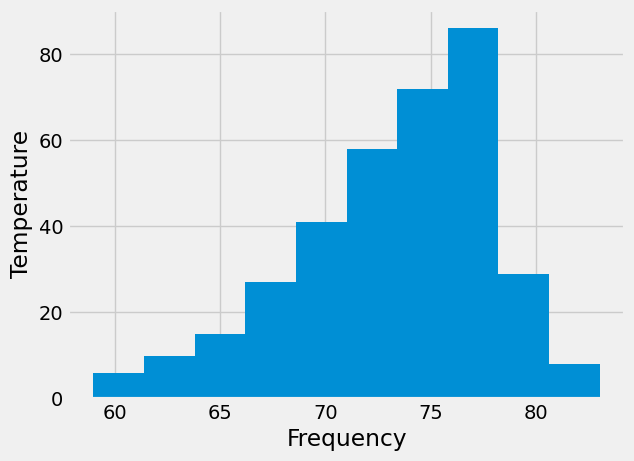

In [154]:
plt.hist(temp)
plt.xlabel("Frequency")
plt.ylabel("Temperature")

Text(0.5, 4.183333333333314, 'Temperature')

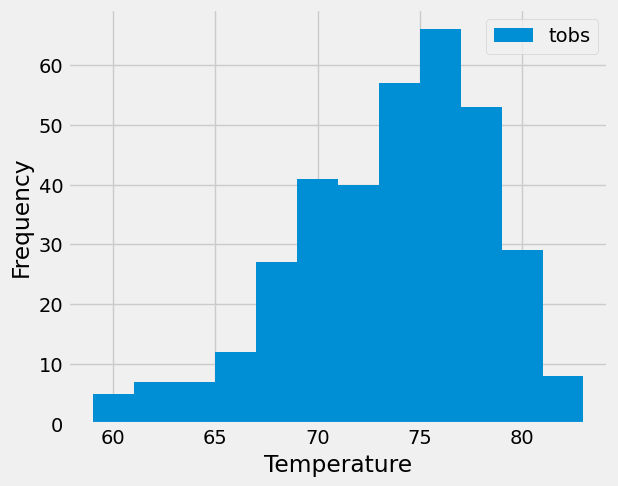

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Close Session

In [16]:
# Close Session
session.close()